<a href="https://colab.research.google.com/github/DevHyunseo/PoscoAcademy_Bigdata/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B83_%EC%A2%85%ED%95%A9%EC%8B%A4%EC%8A%B5(%EB%8C%80%ED%98%95%EB%A7%88%ED%8A%B8)_%EA%B7%B8%EB%A3%B9%EB%B3%84_%ED%8A%B9%EC%A7%95_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
sns.set_palette('Pastel1')
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes",unicode_minus = False)
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 최적 모델, 파라미터 탐색
#
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 고객데이터

In [ ]:
df = pd.read_csv("//home/piai/바탕화면/빅데이터주간/A4_대형마트/member_data.csv")

In [ ]:
df[['구', '동']] = df['주소'].str.split('-', 1, expand=True)

# 고객데이터 박스플랏

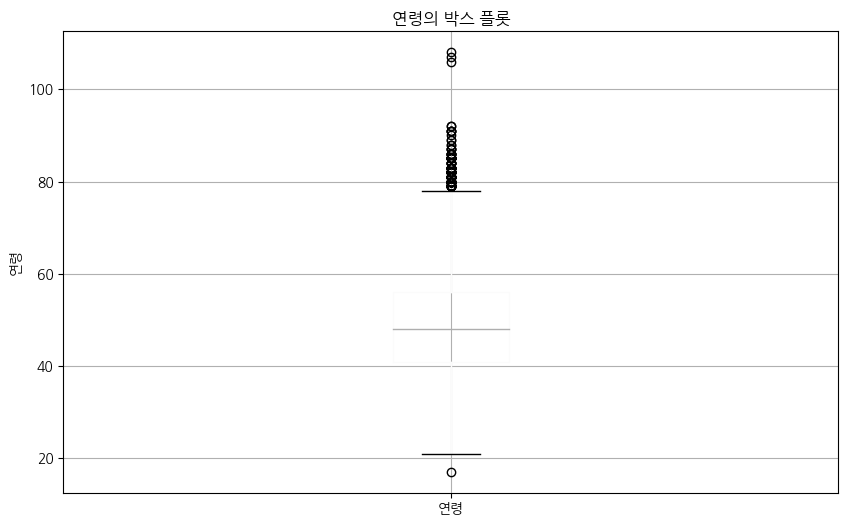

In [ ]:
plt.figure(figsize=(10, 6))
boxplot = df[['연령']].boxplot()
plt.title('연령의 박스 플롯')
plt.ylabel('연령')

# y축 레이블을 정수로 표시
y_labels = boxplot.get_yticks().astype(int)
boxplot.set_yticklabels(y_labels)

plt.show()

In [ ]:
# 연령을 범주형 데이터로 변환 (10년 단위로 나이대 분류)
bins = [0, 29, 39, 49, 59, 69, float('inf')]
labels = ['20대 이하', '30대', '40대', '50대', '60대', '70대 이상']
df['연령대'] = pd.cut(df['연령'], bins=bins, labels=labels, right=False)

In [ ]:
df.drop(['주소', '연령'], axis=1, inplace=True) #이미 쓴놈들 제외

In [ ]:
df['조합원상태'] = df['조합원상태'].apply(lambda x: x if x == '정상회원' else '탈퇴회원')

In [ ]:
df['조합원상태'].value_counts()

정상회원    11413
탈퇴회원      142
Name: 조합원상태, dtype: int64

In [ ]:
missing_gender = df[df['성별'].isna()]
# 결측값이 있는 행들을 출력
print("성별 결측값이 있는 행들:")
missing_gender

성별 결측값이 있는 행들:


,회원번호,조합원상태,성별,배송서비스신청여부,모바일알람여부,Gold_member,구,동,연령대
3666,1527053696,정상회원,NaN,미신청,.,normal,기타,기타,40대
7098,545864448,정상회원,NaN,미신청,.,normal,기타,기타,NaN


In [ ]:
missing_age = df[df['연령대'].isna()]
# 결측값이 있는 행들을 출력
print("나이 결측값이 있는 행들:")
missing_age

나이 결측값이 있는 행들:


,회원번호,조합원상태,성별,배송서비스신청여부,모바일알람여부,Gold_member,구,동,연령대
5983,383599936,정상회원,여,미신청,.,normal,기타,기타,NaN
7098,545864448,정상회원,NaN,미신청,.,normal,기타,기타,NaN


In [ ]:
# 성별과 연령대의 결측값 제거
df = df.drop(index=3666)
df = df.drop(index=7098) #7098 성별, 나이 둘다 없는 친구 그래서 3개
df = df.drop(index=5983)

In [ ]:
df.isnull().sum()

회원번호           0
조합원상태          0
성별             0
배송서비스신청여부      0
모바일알람여부        0
Gold_member    0
구              0
동              0
연령대            0
dtype: int64

In [ ]:
del df['Gold_member'] #RFM분석을 통해 새로운 VIP 멤버 필요

In [ ]:
df["모바일알람여부"].value_counts() #수신이 너무 적으므로 해결방안 필요

.     10650
수신      902
Name: 모바일알람여부, dtype: int64

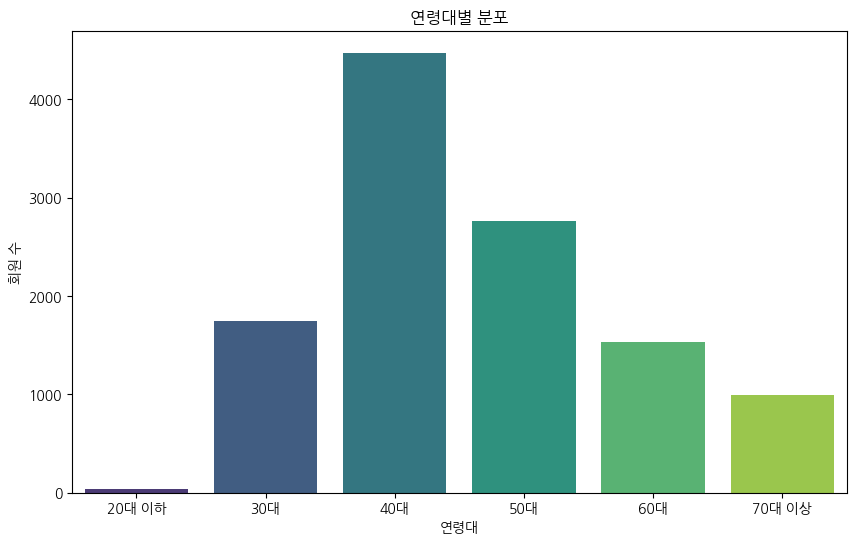

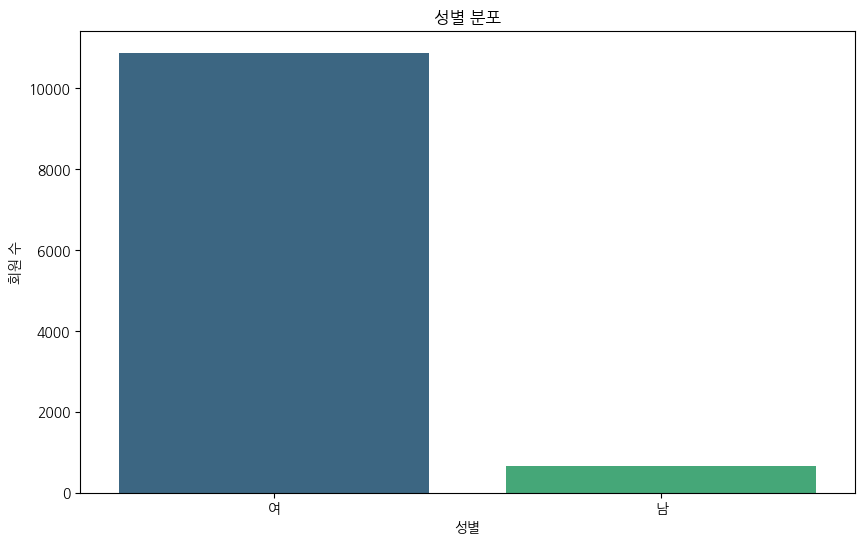

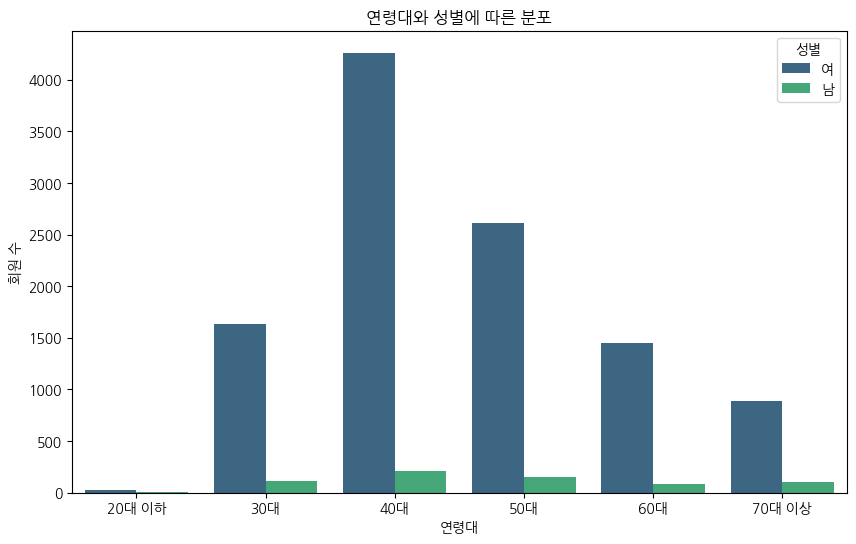

In [ ]:
# 1. 연령대별 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='연령대', palette='viridis')
plt.title('연령대별 분포')
plt.xlabel('연령대')
plt.ylabel('회원 수')
plt.show()

# 2. 성별 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='성별', palette='viridis')
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('회원 수')
plt.show()

# 3. 연령대와 성별에 따른 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='연령대', hue='성별', palette='viridis')
plt.title('연령대와 성별에 따른 분포')
plt.xlabel('연령대')
plt.ylabel('회원 수')
plt.legend(title='성별')
plt.show()


Text(0, 0.5, '')

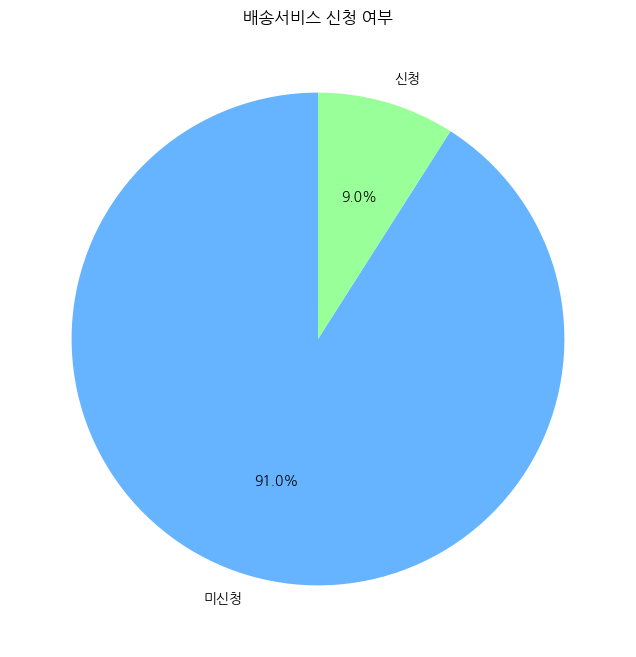

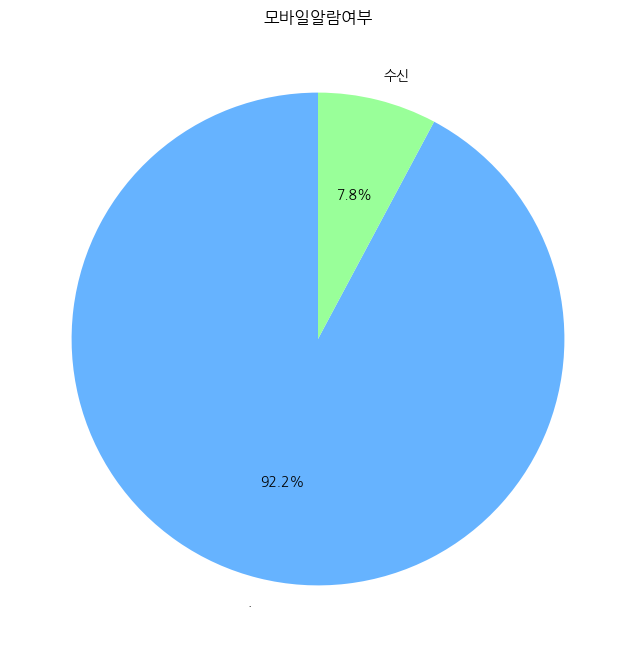

In [ ]:
plt.figure(figsize=(8, 8))
df['배송서비스신청여부'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('배송서비스 신청 여부')
plt.ylabel('')

plt.figure(figsize=(8, 8))
df['모바일알람여부'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('모바일알람여부')
plt.ylabel('')


In [ ]:
df

,회원번호,조합원상태,성별,배송서비스신청여부,모바일알람여부,구,동,연령대
0,1000012800,정상회원,여,미신청,.,수지구,풍덕천동,50대
1,1000103744,정상회원,여,미신청,.,처인구,고림동,30대
2,1000122304,정상회원,여,미신청,.,광주,기타,30대
3,1000163136,정상회원,여,미신청,.,수지구,동천동,70대 이상
4,1000281920,정상회원,여,신청,.,수지구,풍덕천동,40대
...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴회원,여,미신청,.,수지구,동천동,40대
11551,999721408,정상회원,여,미신청,.,수지구,동천동,40대
11552,999738112,정상회원,여,미신청,.,수지구,성복동,60대
11553,999754816,정상회원,여,신청,.,수지구,상현동,40대


- 배송서비스 신청 비율이 너무나 낮게나옴, 어플리케이션을 이용하는 비율이 낮기 때문? 이유 중 하나

- VIP의 숫자가 총 회원에 비해 너무 적어서 RFM방식을 통해 재정립 필요

- 모바일 알람 수신 비율이 너무나 낮게나옴, 어플리케이션을 이용하는 비율이 낮기 때문? 이유 중 하나

# 판매데이터

In [ ]:
df1 = pd.read_csv("/home/piai/바탕화면/빅데이터주간/A4_대형마트/product_data_001.csv", encoding = 'euc-kr')
df2 = pd.read_csv("/home/piai/바탕화면/빅데이터주간/A4_대형마트/product_data_002.csv", encoding = 'euc-kr')
df3 = pd.read_csv("/home/piai/바탕화면/빅데이터주간/A4_대형마트/product_data_003.csv", encoding = 'euc-kr')
df4 = pd.read_csv("/home/piai/바탕화면/빅데이터주간/A4_대형마트/product_data_004.csv", encoding = 'euc-kr')
dfm = pd.concat([df4, df3, df1, df2], ignore_index=True)
dfm
# dfm.to_csv("/home/piai/다운로드/대형마트/product_m.csv", encoding = 'euc-kr')

,Unnamed: 0.1,Unnamed: 0,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자
0,0,0,2023-01-06,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829,매장A,10:32,NaN
1,1,1,2023-01-06,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977,매장A,10:41,NaN
2,2,2,2023-01-06,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,11:00,NaN
3,3,3,2023-01-06,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083,매장A,11:28,NaN
4,4,4,2023-01-06,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,11:59,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,55103,55103,2023-11-04,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315,매장D,13:16,NaN
294641,55104,55104,2023-11-04,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892,매장D,11:08,NaN
294642,55105,55105,2023-11-04,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466,매장D,14:27,NaN
294643,55106,55106,2023-11-04,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3733,매장D,16:02,NaN


In [ ]:
dfm[['년','월','일']] = dfm['공급일자'].str.split('-', 2, expand=True)

In [ ]:
dfm.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
# unnamed 데이터 드랍

In [ ]:
dfm.isnull().sum()
# 결측치가 없는 것 확인

공급일자          0
회원번호          0
조합원상태         0
물품대분류         0
물품중분류         0
물품소분류         0
물품명           0
구매수량          0
구매금액          0
구매매장          0
구매시각          0
반품일자     289685
년             0
월             0
일             0
dtype: int64

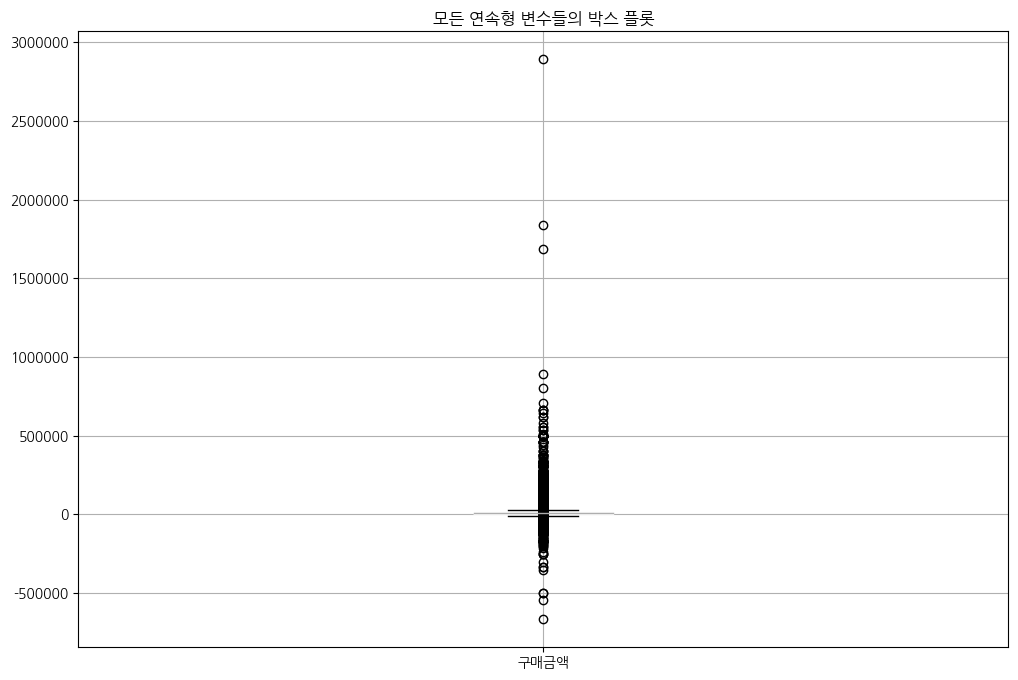

In [ ]:
plt.figure(figsize=(12, 8))
boxplot = dfm[['구매금액']].boxplot()
plt.title('모든 연속형 변수들의 박스 플롯')

# y축 레이블을 정수로 표시
for column in dfm.columns:
    y_labels = boxplot.get_yticks().astype(int)
    boxplot.set_yticklabels(y_labels)

plt.show()

In [ ]:
dfm[dfm['구매금액']>1500000]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,년,월,일
35788,2023-07-27,153723200,정상회원,채소,버섯,상황버섯,린테우스상황버섯(200g/유),10.0,2890766,매장A,19:11,NaN,2023,07,27
193243,2023-07-11,357357952,정상회원,건강,홍삼/녹용,홍삼,홍삼액(6년근/60봉),8.0,1837838,매장C,16:23,NaN,2023,07,11
249098,2023-02-27,742461248,정상회원,양념/가루,장,메주,메주(1말:약6-7kg:솔뫼),9.0,1688514,매장D,11:30,NaN,2023,02,27


In [ ]:
dfm[dfm['물품명']=='린테우스상황버섯(200g/유)']
dfm = dfm.drop(index=35788)

#이상치 삭제 검색결과 200g이 300만원에 육박하는 경우는 보지 못했음

In [ ]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294644 entries, 0 to 294644
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   공급일자    294644 non-null  object 
 1   회원번호    294644 non-null  int64  
 2   조합원상태   294644 non-null  object 
 3   물품대분류   294644 non-null  object 
 4   물품중분류   294644 non-null  object 
 5   물품소분류   294644 non-null  object 
 6   물품명     294644 non-null  object 
 7   구매수량    294644 non-null  float64
 8   구매금액    294644 non-null  int64  
 9   구매매장    294644 non-null  object 
 10  구매시각    294644 non-null  object 
 11  반품일자    4960 non-null    object 
 12  년       294644 non-null  object 
 13  월       294644 non-null  object 
 14  일       294644 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 36.0+ MB


In [ ]:
dfm["조합원상태"].value_counts() #제품 규격 기준국

정상회원     291370
탈퇴         3216
탈퇴처리중        53
탈퇴신청          5
Name: 조합원상태, dtype: int64

In [ ]:
dfm['조합원상태'] = dfm['조합원상태'].apply(lambda x: x if x == '정상회원' else '탈퇴회원')

In [ ]:
dfm["조합원상태"].value_counts() #제품 규격 기준국

정상회원    291370
탈퇴회원      3274
Name: 조합원상태, dtype: int64

In [ ]:
dfm

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,년,월,일
0,2023-01-06,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829,매장A,10:32,NaN,2023,01,06
1,2023-01-06,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977,매장A,10:41,NaN,2023,01,06
2,2023-01-06,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,11:00,NaN,2023,01,06
3,2023-01-06,786634048,탈퇴회원,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083,매장A,11:28,NaN,2023,01,06
4,2023-01-06,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,11:59,NaN,2023,01,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,2023-11-04,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315,매장D,13:16,NaN,2023,11,04
294641,2023-11-04,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892,매장D,11:08,NaN,2023,11,04
294642,2023-11-04,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466,매장D,14:27,NaN,2023,11,04
294643,2023-11-04,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3733,매장D,16:02,NaN,2023,11,04


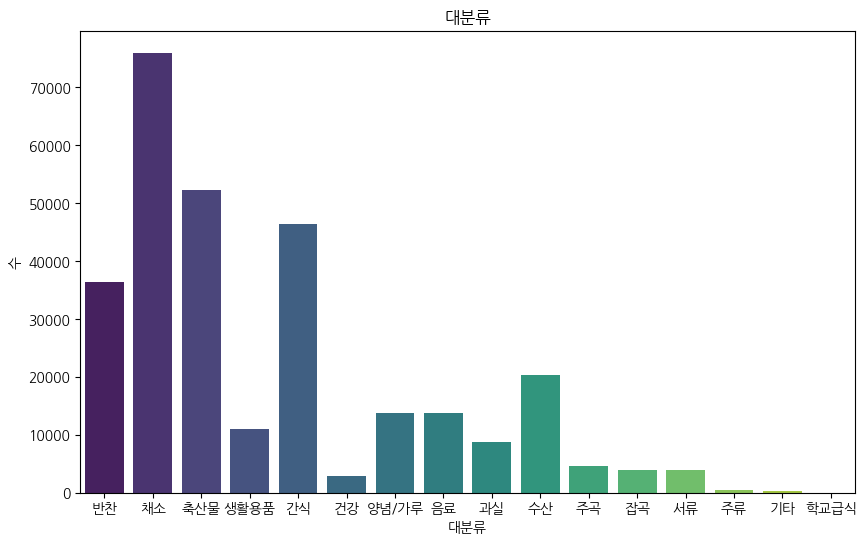

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dfm, x='물품대분류', palette='viridis')
plt.title('대분류')
plt.xlabel('대분류')
plt.ylabel('수')
plt.show()

In [ ]:
dfm[dfm['물품대분류']=='학교급식'] #삭제
dfm = dfm.drop(index=292651)


In [ ]:
dfm[dfm["구매금액"] == 0] #삭제 455개 but 구매수량 0인거랑 중복될수 있음

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,년,월,일
1157,2023-01-12,555987072,정상회원,과실,과일,사과,사과/(2kg)/중,0.0,0,매장A,17:24,2023-01-13,2023,01,12
1183,2023-01-12,555987072,정상회원,과실,과일,사과,사과/(2kg)/중,0.0,0,매장A,17:50,NaN,2023,01,12
1284,2023-01-12,555987072,정상회원,과실,과일,사과,사과/(2kg)/중,0.0,0,매장A,18:09,2023-01-13,2023,01,12
3766,2023-01-26,38808960,정상회원,채소,뿌리채소,울금,울금(500g),0.0,0,매장A,19:44,NaN,2023,01,26
3904,2023-01-27,64306688,정상회원,서류,고구마,고구마,황금고구마(1kg),0.0,0,매장A,13:51,NaN,2023,01,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293288,2023-10-27,330410688,정상회원,생활용품,화장품,유아/썬크림,자연그대로 아토크림(증정/15g),1.0,0,매장D,12:33,NaN,2023,10,27
293647,2023-10-29,993938112,정상회원,생활용품,화장품,유아/썬크림,자연그대로 아토크림(증정/15g),1.0,0,매장D,19:21,NaN,2023,10,29
293775,2023-10-30,993938112,정상회원,축산물,유제품,우유/산양유,저지방우유(범산/900ml),0.0,0,매장D,10:33,NaN,2023,10,30
293826,2023-10-30,605683328,정상회원,생활용품,화장품,유아/썬크림,자연그대로 아토크림(증정/15g),1.0,0,매장D,11:13,NaN,2023,10,30


In [ ]:
# dfm[(dfm['구매금액'] == 0) & (dfm['구매수량'] == 1)]
# item_names = dfm[(dfm['구매금액'] == 0) & (dfm['구매수량'] == 1)]['물품명']
# item_names
# 증정품 데이터 발견, 어떻게 처리하지?

In [ ]:
dfm[dfm["구매수량"] == 0] #삭제 65개 마찬가지로 중복될 수 있음
# 증정품은 판매데이터 아니라서 밀자, 2안 프로모션기간인가? -> 드랍하지 않고 keep

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,년,월,일
1157,2023-01-12,555987072,정상회원,과실,과일,사과,사과/(2kg)/중,0.0,0,매장A,17:24,2023-01-13,2023,01,12
1183,2023-01-12,555987072,정상회원,과실,과일,사과,사과/(2kg)/중,0.0,0,매장A,17:50,NaN,2023,01,12
1284,2023-01-12,555987072,정상회원,과실,과일,사과,사과/(2kg)/중,0.0,0,매장A,18:09,2023-01-13,2023,01,12
3766,2023-01-26,38808960,정상회원,채소,뿌리채소,울금,울금(500g),0.0,0,매장A,19:44,NaN,2023,01,26
3904,2023-01-27,64306688,정상회원,서류,고구마,고구마,황금고구마(1kg),0.0,0,매장A,13:51,NaN,2023,01,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282277,2023-08-27,112698176,정상회원,채소,과일채소,완숙토마토,완숙토마토(2kg),0.0,0,매장D,10:59,NaN,2023,08,27
284205,2023-09-05,1047253568,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),0.0,0,매장D,11:57,NaN,2023,09,05
284470,2023-09-07,52558208,정상회원,채소,과일채소,완숙토마토,완숙토마토(2kg),0.0,0,매장D,10:11,NaN,2023,09,07
284755,2023-09-09,52558208,정상회원,채소,과일채소,완숙토마토,완숙토마토(2kg),0.0,0,매장D,10:37,NaN,2023,09,09


In [ ]:
dfm[dfm["물품명"] == "중성세제 샘플(증정/100㎖)"]["공급일자"].value_counts()
#프로모션 기간 체크

2023-03-28    21
2023-03-27    17
2023-03-25    15
2023-03-24    13
2023-03-26    11
2023-03-23     9
2023-03-29     7
Name: 공급일자, dtype: int64

In [ ]:
dfm[dfm["물품명"]== "조합원의식조사설문"]
dfm = dfm[dfm["물품명"]!= "조합원의식조사설문"]
# 이게 삭제코드

In [ ]:
dfm[(dfm["물품명"] == "통삼겹-성남용인") & (dfm["구매금액"] == 0)]
dfm = dfm.drop(index=134334)
# 금액예측이 안되므로 삭제

In [ ]:
dfm[(dfm["구매수량"] <0)]
# 구매수량이 음수인 것은 환불인 것으로 예상

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,년,월,일
88,2023-01-06,74562944,정상회원,간식,떡,즉석떡,말랑말랑백미가래떡(400g),-1.0,-6318,매장A,19:58,2023-01-07,2023,01,06
108,2023-01-06,796003136,정상회원,축산물,육가공,햄/소시지/훈제,김밥용햄(285g),-1.0,-8615,매장A,15:07,NaN,2023,01,06
145,2023-01-06,554236864,정상회원,간식,빵,"찐빵,호떡,전통",팥찐빵(5개:400g)/매장,-1.0,-7275,매장A,15:40,2023-01-08,2023,01,06
744,2023-01-09,1474985472,정상회원,간식,떡,즉석떡,모듬배기찰떡(160g),-1.0,-5743,매장A,15:20,2023-01-12,2023,01,09
827,2023-01-10,1390554176,정상회원,축산물,유제품,우유/산양유,목초우유(900ml),-1.0,-11295,매장A,12:48,2023-01-11,2023,01,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294283,2023-11-02,1618521088,정상회원,축산물,육가공,햄/소시지/훈제,슬라이스햄(200g)-매장,-1.0,-6509,매장D,12:56,2023-11-05,2023,11,02
294304,2023-11-02,1163403904,정상회원,주곡,멥쌀,멥쌀,칠분도미/유(2kg),-1.0,-15124,매장D,18:58,2023-11-03,2023,11,02
294466,2023-11-04,654809792,정상회원,양념/가루,가루,프리믹스,핫케이크가루(600g),-1.0,-8041,매장D,16:02,2023-11-07,2023,11,04
294558,2023-11-04,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),-1.0,-3733,매장D,16:02,2023-11-05,2023,11,04


In [ ]:
dfm[dfm["물품명"] == "배/(대:5kg)"]
#개수 소수점인것은 금액 비례하는 것 확인 지우는것 불필요

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,년,월,일
257,2023-01-07,438814080,정상회원,과실,과일,배,배/(대:5kg),0.25,10338,매장A,12:45,NaN,2023,01,07
62669,2023-02-18,377644032,정상회원,과실,과일,배,배/(대:5kg),1.00,41351,매장B,16:10,NaN,2023,02,18
63888,2023-02-27,392584832,정상회원,과실,과일,배,배/(대:5kg),0.50,20676,매장B,15:19,NaN,2023,02,27
118765,2023-01-11,153747328,정상회원,과실,과일,배,배/(대:5kg),1.00,41351,매장C,16:25,NaN,2023,01,11
122610,2023-01-20,691612416,정상회원,과실,과일,배,배/(대:5kg),0.50,20676,매장C,11:47,NaN,2023,01,20
122781,2023-01-20,747264576,정상회원,과실,과일,배,배/(대:5kg),0.50,20676,매장C,11:11,NaN,2023,01,20
122933,2023-01-20,470496000,정상회원,과실,과일,배,배/(대:5kg),0.50,20676,매장C,15:58,NaN,2023,01,20
130321,2023-02-07,1205299392,정상회원,과실,과일,배,배/(대:5kg),-1.00,-41351,매장C,14:52,2023-02-08,2023,02,07
134193,2023-02-16,744588224,정상회원,과실,과일,배,배/(대:5kg),4.00,165405,매장C,14:07,NaN,2023,02,16
135379,2023-02-18,19627200,정상회원,과실,과일,배,배/(대:5kg),1.00,41351,매장C,15:09,NaN,2023,02,18


In [ ]:
dfm[(dfm["반품일자"].notna()) & (dfm['구매수량'] > 0)]
dfm = dfm.drop(index = 849)
dfm = dfm.drop(index = 105556)
dfm = dfm.drop(index = 161974)
dfm = dfm.drop(index = 261634)
# 반품일자가 있지만 반품이 아닌 구매데이터임

In [ ]:
dfm[dfm["회원번호"] == 151032000]
# 매장ABCD 전부 구매시각 기준으로 정렬한 후에 다시 확인

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,년,월,일
823,2023-01-10,151032000,정상회원,과실,과일,참다래,참다래(골드:2kg),1.0,28333,매장A,11:28,NaN,2023,01,10
825,2023-01-10,151032000,정상회원,간식,빵,페스츄리류,크루아상(150g)/매장,1.0,6509,매장A,11:54,NaN,2023,01,10
876,2023-01-10,151032000,정상회원,채소,잎/줄기채소,시금치,시금치(300g),1.0,4403,매장A,11:28,NaN,2023,01,10
879,2023-01-10,151032000,정상회원,채소,과일채소,딸기,딸기(1kg),-1.0,-31588,매장A,11:53,2023-01-11,2023,01,10
907,2023-01-10,151032000,정상회원,생활용품,화장품,세안제/팩,수피아 해맑은 클렌징폼(120㎖),-1.0,-16655,매장A,11:53,2023-01-11,2023,01,10
934,2023-01-10,151032000,정상회원,주곡,멥쌀,멥쌀,오분도미/유(8kg)-매장용,-1.0,-57432,매장A,11:52,2023-01-13,2023,01,10
960,2023-01-10,151032000,정상회원,생활용품,화장품,세안제/팩,수피아 해맑은 클렌징폼(120㎖),1.0,16655,매장A,11:28,NaN,2023,01,10
962,2023-01-10,151032000,정상회원,주곡,멥쌀,멥쌀,오분도미/유(8kg)-매장용,-1.0,-57432,매장A,11:53,2023-01-11,2023,01,10
983,2023-01-10,151032000,정상회원,축산물,알,유정란,동물복지유정란/중란(10알/국내산),2.0,11104,매장A,11:28,NaN,2023,01,10
984,2023-01-10,151032000,정상회원,과실,과일,참다래,참다래(골드:2kg),-1.0,-28333,매장A,11:52,2023-01-11,2023,01,10


In [ ]:
dfm[['년','월','일']] = dfm['공급일자'].str.split('-', 2, expand=True)

In [ ]:
# '년', '월', '일'을 결합하여 '방문일' 컬럼 생성
dfm['최근방문일'] = pd.to_datetime(dfm['년'] + '-' + dfm['월'] + '-' + dfm['일'], format='%Y-%m-%d')

# 회원번호별로 가장 최근 방문일 찾기
recent_visits = dfm.groupby('회원번호')['최근방문일'].max().reset_index()

# 결과 출력
print(recent_visits)
# del dfm['방문일']

             회원번호      최근방문일
0        18613824 2023-07-08
1        18764160 2023-08-27
2        18792000 2023-04-09
3        18942336 2023-10-24
4        18949760 2023-10-04
...           ...        ...
11550  1644772352 2023-11-03
11551  1644957952 2023-11-03
11552  1670400000 2023-11-04
11553  1670606016 2023-10-16
11554  1670620864 2023-06-10

[11555 rows x 2 columns]


In [ ]:
# '년', '월', '일'을 결합하여 '방문일' 컬럼 생성
dfm['최근방문일'] = pd.to_datetime(dfm['년'] + '-' + dfm['월'] + '-' + dfm['일'], format='%Y-%m-%d')

# 기준 날짜 설정
reference_date = pd.to_datetime('2023-11-04')

# 기준 날짜와 방문일의 차이 계산
dfm['일차'] = (reference_date - dfm['최근방문일']).dt.days

# 각 회원번호별로 가장 최근 방문일 찾기
recent_visits = dfm.loc[dfm.groupby('회원번호')['최근방문일'].idxmax()].reset_index(drop=True)

# 그룹화 조건에 따라 그룹 할당
def assign_group(days):
    if days <= 14:
        return 4
    elif days <= 30:
        return 3
    elif days <= 90:
        return 2
    else:
        return 1


recent_visits['최근방문일그룹화'] = recent_visits['일차'].apply(assign_group)

# 최근 방문일 기준으로 그룹 정보를 원래 데이터프레임에 추가
dfm = pd.merge(dfm, recent_visits[['회원번호', '최근방문일그룹화']], on='회원번호', how='left')

# 결과 출력
dfm


,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,년,월,일,최근방문일,일차,최근방문일그룹화
0,2023-01-06,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829,매장A,10:32,NaN,2023,01,06,2023-01-06,302,4
1,2023-01-06,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977,매장A,10:41,NaN,2023,01,06,2023-01-06,302,4
2,2023-01-06,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,11:00,NaN,2023,01,06,2023-01-06,302,2
3,2023-01-06,786634048,탈퇴회원,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083,매장A,11:28,NaN,2023,01,06,2023-01-06,302,1
4,2023-01-06,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,11:59,NaN,2023,01,06,2023-01-06,302,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294546,2023-11-04,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315,매장D,13:16,NaN,2023,11,04,2023-11-04,0,4
294547,2023-11-04,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892,매장D,11:08,NaN,2023,11,04,2023-11-04,0,4
294548,2023-11-04,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466,매장D,14:27,NaN,2023,11,04,2023-11-04,0,4
294549,2023-11-04,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3733,매장D,16:02,NaN,2023,11,04,2023-11-04,0,4


In [ ]:
# 원래 데이터프레임 df에 그룹 정보를 추가
df = pd.merge(df, recent_visits[['회원번호', '최근방문일그룹화']], on='회원번호', how='left')

# # 불필요한 컬럼 제거
# df = df.drop(columns=['방문일', '일차'])

# 결과 출력
df

,회원번호,조합원상태,성별,배송서비스신청여부,모바일알람여부,구,동,연령대,최근방문일그룹화
0,1000012800,정상회원,여,미신청,.,수지구,풍덕천동,50대,1
1,1000103744,정상회원,여,미신청,.,처인구,고림동,30대,3
2,1000122304,정상회원,여,미신청,.,광주,기타,30대,4
3,1000163136,정상회원,여,미신청,.,수지구,동천동,70대 이상,4
4,1000281920,정상회원,여,신청,.,수지구,풍덕천동,40대,3
...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴회원,여,미신청,.,수지구,동천동,40대,1
11548,999721408,정상회원,여,미신청,.,수지구,동천동,40대,2
11549,999738112,정상회원,여,미신청,.,수지구,성복동,60대,4
11550,999754816,정상회원,여,신청,.,수지구,상현동,40대,4


In [ ]:
# del df['그룹']
df['최근방문일그룹화'].value_counts()

4    3841
1    3624
2    2505
3    1582
Name: 최근방문일그룹화, dtype: int64

In [ ]:
total_purchase_by_member = dfm.groupby('회원번호')['구매금액'].sum().reset_index()
total_purchase_by_member.columns = ['회원번호', '총구매금액']

# 원래 데이터프레임 dfm에 총구매금액 정보 추가
dfm = pd.merge(dfm, total_purchase_by_member, on='회원번호', how='left')

# 결과 출력
print(dfm)


              공급일자        회원번호 조합원상태 물품대분류   물품중분류   물품소분류               물품명  \
0       2023-01-06   220954944  정상회원    반찬   두부/유부      두부       두부(1모:420g)   
1       2023-01-06    89023040  정상회원    채소    열매채소  단호박/손질    단호박(깍뚝썰기/300g)   
2       2023-01-06   354941440  정상회원   축산물       알     유정란  유정란/매장용(10알/국내산)   
3       2023-01-06   786634048  탈퇴회원    반찬    어묵/묵       묵     도토리묵(420g:1모)   
4       2023-01-06   438543104  정상회원   축산물       알     유정란  유정란/매장용(10알/국내산)   
...            ...         ...   ...   ...     ...     ...               ...   
294546  2023-11-04   560448896  정상회원    주곡      멥쌀      멥쌀         백미/유(2kg)   
294547  2023-11-04    68976384  정상회원    채소  잎/줄기채소     시금치         시금치(300g)   
294548  2023-11-04  1519813440  정상회원    반찬     밑반찬     김가공     구운자른김(15g*3봉)   
294549  2023-11-04   654809792  정상회원    반찬   두부/유부      두부       두부(1모:420g)   
294550  2023-11-04   349564608  정상회원    채소    열매채소     애호박           애호박(1개)   

        구매수량   구매금액 구매매장   구매시각 반품일자   

In [ ]:
# dfm[dfm['총구매금액']<0] 이거 확인해야함

In [ ]:
total_purchase_by_member = dfm.groupby('회원번호')['구매금액'].sum().reset_index()
total_purchase_by_member.columns = ['회원번호', '총구매금액']

# df 데이터프레임에 총구매금액 정보 추가
df = pd.merge(df, total_purchase_by_member, on='회원번호', how='left')

# 결과 출력
print(df)

             회원번호 조합원상태 성별 배송서비스신청여부 모바일알람여부    구     동     연령대  최근방문일그룹화  \
0      1000012800  정상회원  여       미신청       .  수지구  풍덕천동     50대         1   
1      1000103744  정상회원  여       미신청       .  처인구   고림동     30대         3   
2      1000122304  정상회원  여       미신청       .   광주    기타     30대         4   
3      1000163136  정상회원  여       미신청       .  수지구   동천동  70대 이상         4   
4      1000281920  정상회원  여        신청       .  수지구  풍덕천동     40대         3   
...           ...   ... ..       ...     ...  ...   ...     ...       ...   
11547   999682432  탈퇴회원  여       미신청       .  수지구   동천동     40대         1   
11548   999721408  정상회원  여       미신청       .  수지구   동천동     40대         2   
11549   999738112  정상회원  여       미신청       .  수지구   성복동     60대         4   
11550   999754816  정상회원  여        신청       .  수지구   상현동     40대         4   
11551    99995712  정상회원  여       미신청       .  수지구   상현동     60대         4   

         총구매금액  
0         7658  
1        36948  
2       142831  
3      

In [ ]:
# 총구매금액을 기준으로 10개의 그룹으로 나누기
df['구매금액그룹'] = pd.qcut(df['총구매금액'], q=[0, 0.2, 0.5, 0.8, 1], labels=[1, 2, 3, 4])
# 결과 출력
df


,회원번호,조합원상태,성별,배송서비스신청여부,모바일알람여부,구,동,연령대,최근방문일그룹화,총구매금액,구매금액그룹
0,1000012800,정상회원,여,미신청,.,수지구,풍덕천동,50대,1,7658,1
1,1000103744,정상회원,여,미신청,.,처인구,고림동,30대,3,36948,2
2,1000122304,정상회원,여,미신청,.,광주,기타,30대,4,142831,3
3,1000163136,정상회원,여,미신청,.,수지구,동천동,70대 이상,4,138892,3
4,1000281920,정상회원,여,신청,.,수지구,풍덕천동,40대,3,592543,4
...,...,...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴회원,여,미신청,.,수지구,동천동,40대,1,39246,2
11548,999721408,정상회원,여,미신청,.,수지구,동천동,40대,2,39820,2
11549,999738112,정상회원,여,미신청,.,수지구,성복동,60대,4,152960,3
11550,999754816,정상회원,여,신청,.,수지구,상현동,40대,4,641334,4


In [ ]:
# 구매금액이 음수인 행들 필터링
negative_purchases = dfm[dfm['구매금액'] < 0]

# 회원번호별로 음수 구매금액을 가진 고객 리스트
negative_purchases_by_member = negative_purchases.groupby('회원번호').sum().reset_index()

# 결과 출력
print(negative_purchases_by_member)

            회원번호  구매수량     구매금액    일차  최근방문일그룹화      총구매금액
0       18764160  -2.0  -175360   451         4    -177654
1       19627200  -5.0   -88638   721        16    7155404
2       19996544  -6.0  -122522   764        16    5145952
3       20588608  -5.0  -103379   299        20   13870715
4       20636864  -9.0  -105425  1806        14    2665313
...          ...   ...      ...   ...       ...        ...
1664  1631821184  -3.0    -9476    15        12     512013
1665  1632667520  -1.0    -5552    41         4      46519
1666  1636303424  -1.0    -2297    28         3      -2297
1667  1640410752  -2.0    -1532    17         3      11390
1668  1670400000 -89.5 -1147164  9101       284  927312114

[1669 rows x 6 columns]


In [ ]:
# # # 총구매금액이 음수인 행들 필터링
# # negative_total_purchases = df[df['총구매금액'] < 0]
# # negative_total_purchases
# # #하나씩 보고 지우자
# 빼도되냐가 포인트

- dfm에서 회원번호별 거래내역을 확인/ 이상한 점 발견시 제거

In [ ]:
def calculate_store_visits(data):
    # 회원번호 별로 그룹화하고 각 그룹의 크기를 계산하여 방문 횟수를 카운트
    visits_count = data.groupby('회원번호').size().reset_index(name='총방문횟수')
    return visits_count

# 데이터프레임 'dfm' 사용 예제
store_visits = calculate_store_visits(dfm)
print(store_visits)

df = pd.merge(df, store_visits[['회원번호', '총방문횟수']], on='회원번호', how='left')

             회원번호  총방문횟수
0        18613824      1
1        18764160     10
2        18792000      1
3        18942336     32
4        18949760      1
...           ...    ...
11550  1644772352      2
11551  1644957952      4
11552  1670400000   1355
11553  1670606016     12
11554  1670620864     22

[11555 rows x 2 columns]


In [ ]:
df['방문횟수 그룹'] = pd.qcut(df['총방문횟수'], q=[0, 0.2, 0.5, 0.8, 1], labels=[1, 2, 3, 4])

In [ ]:
df

,회원번호,조합원상태,성별,배송서비스신청여부,모바일알람여부,구,동,연령대,최근방문일그룹화,총구매금액,구매금액그룹,총방문횟수,방문횟수 그룹
0,1000012800,정상회원,여,미신청,.,수지구,풍덕천동,50대,1,7658,1,1,1
1,1000103744,정상회원,여,미신청,.,처인구,고림동,30대,3,36948,2,6,2
2,1000122304,정상회원,여,미신청,.,광주,기타,30대,4,142831,3,22,3
3,1000163136,정상회원,여,미신청,.,수지구,동천동,70대 이상,4,138892,3,8,2
4,1000281920,정상회원,여,신청,.,수지구,풍덕천동,40대,3,592543,4,45,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴회원,여,미신청,.,수지구,동천동,40대,1,39246,2,2,1
11548,999721408,정상회원,여,미신청,.,수지구,동천동,40대,2,39820,2,3,2
11549,999738112,정상회원,여,미신청,.,수지구,성복동,60대,4,152960,3,15,3
11550,999754816,정상회원,여,신청,.,수지구,상현동,40대,4,641334,4,48,4


In [ ]:
# 구매금액점수를 정수형으로 변환
df['구매금액그룹'] = df['구매금액그룹'].astype(int)
df['최근방문일그룹화'] = df['최근방문일그룹화'].astype(int)
df['방문횟수 그룹'] = df['방문횟수 그룹'].astype(int)

In [ ]:
df['RFM_Score'] = df['최근방문일그룹화'] + df['구매금액그룹'] + df['방문횟수 그룹']

Text(0, 0.5, '')

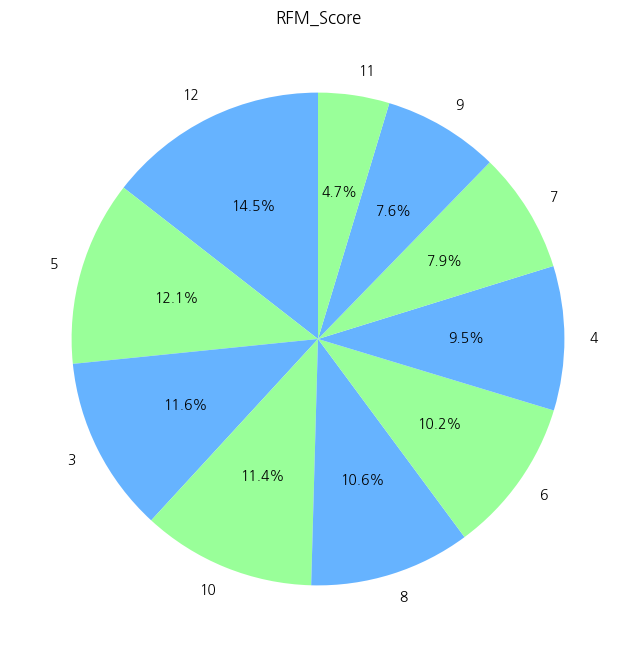

In [ ]:
plt.figure(figsize=(8, 8))
df['RFM_Score'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('RFM_Score')
plt.ylabel('')

In [ ]:
df['VIP'] = df['RFM_Score'] >= 11

In [ ]:
X = df[['최근방문일그룹화', '구매금액그룹', '방문횟수 그룹']]
y = df['VIP']

# 상수항 추가
X = sm.add_constant(X)

# 회귀분석 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

# 회귀계수 확인
coefficients = model.params

a = coefficients['최근방문일그룹화']
b = coefficients['구매금액그룹']
c = coefficients['방문횟수 그룹']

print(f"a: {a}, b: {b}, c: {c}")
#a,b,c 계수들을 총합이 1인 숫자로 변환하면 0.2 0.35 0.45

                            OLS Regression Results                            
Dep. Variable:                    VIP   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     4010.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:53:56   Log-Likelihood:                -1493.4
No. Observations:               11552   AIC:                             2995.
Df Residuals:                   11548   BIC:                             3024.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5069      0.007    -72.835      0.0

In [ ]:
# VIP 점수 계산
df['VIP점수'] = (0.2 * df['최근방문일그룹화'] + 0.35 * df['구매금액그룹'] + 0.45 * df['방문횟수 그룹'])

# VIP 선정
df['VIP선정'] = df['VIP점수'] >= 4

# 결과 출력
df['VIP선정'].value_counts()

False    9880
True     1672
Name: VIP선정, dtype: int64

Text(0, 0.5, '')

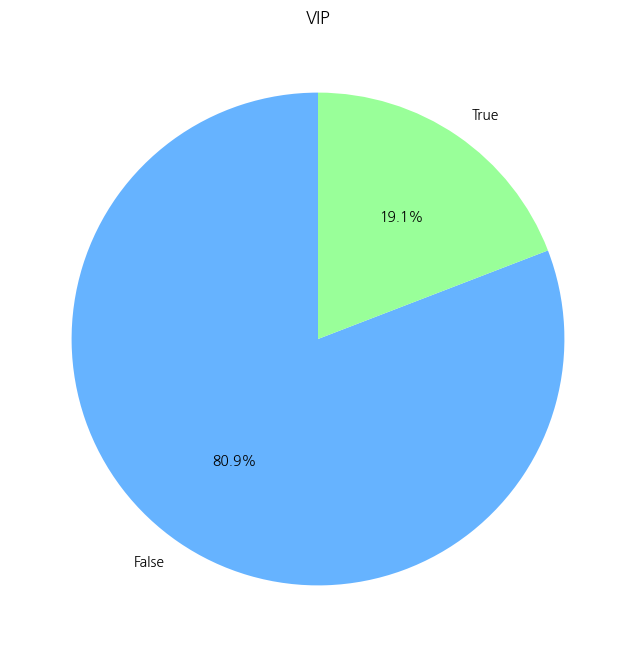

In [ ]:
plt.figure(figsize=(8, 8))
df['VIP'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('VIP')
plt.ylabel('')

Text(0, 0.5, '')

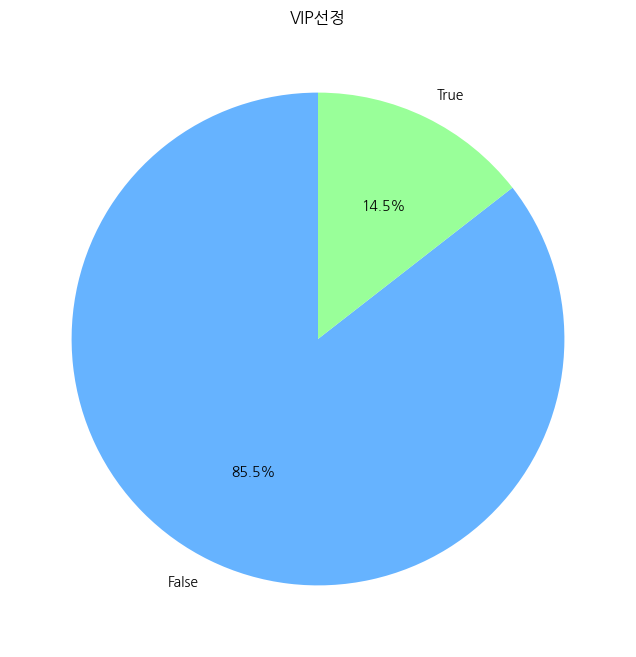

In [ ]:
plt.figure(figsize=(8, 8))
df['VIP선정'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('VIP선정')
plt.ylabel('')

In [ ]:
dfm = dfm.fillna('unknown')

In [ ]:
df

,회원번호,조합원상태,성별,배송서비스신청여부,모바일알람여부,구,동,연령대,최근방문일그룹화,총구매금액,구매금액그룹,총방문횟수,방문횟수 그룹,RFM_Score,VIP,VIP점수,VIP선정
0,1000012800,정상회원,여,미신청,.,수지구,풍덕천동,50대,1,7658,1,1,1,3,False,1.00,False
1,1000103744,정상회원,여,미신청,.,처인구,고림동,30대,3,36948,2,6,2,7,False,2.20,False
2,1000122304,정상회원,여,미신청,.,광주,기타,30대,4,142831,3,22,3,10,False,3.20,False
3,1000163136,정상회원,여,미신청,.,수지구,동천동,70대 이상,4,138892,3,8,2,9,False,2.75,False
4,1000281920,정상회원,여,신청,.,수지구,풍덕천동,40대,3,592543,4,45,4,11,True,3.80,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴회원,여,미신청,.,수지구,동천동,40대,1,39246,2,2,1,4,False,1.35,False
11548,999721408,정상회원,여,미신청,.,수지구,동천동,40대,2,39820,2,3,2,6,False,2.00,False
11549,999738112,정상회원,여,미신청,.,수지구,성복동,60대,4,152960,3,15,3,10,False,3.20,False
11550,999754816,정상회원,여,신청,.,수지구,상현동,40대,4,641334,4,48,4,12,True,4.00,True


In [ ]:
dfm

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,년,월,일,최근방문일,일차,최근방문일그룹화,총구매금액
0,2023-01-06,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829,매장A,10:32,unknown,2023,01,06,2023-01-06,302,4,3140880
1,2023-01-06,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977,매장A,10:41,unknown,2023,01,06,2023-01-06,302,4,662576
2,2023-01-06,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,11:00,unknown,2023,01,06,2023-01-06,302,2,117639
3,2023-01-06,786634048,탈퇴회원,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083,매장A,11:28,unknown,2023,01,06,2023-01-06,302,1,60304
4,2023-01-06,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,11:59,unknown,2023,01,06,2023-01-06,302,2,108930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294546,2023-11-04,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315,매장D,13:16,unknown,2023,11,04,2023-11-04,0,4,947535
294547,2023-11-04,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892,매장D,11:08,unknown,2023,11,04,2023-11-04,0,4,1834601
294548,2023-11-04,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466,매장D,14:27,unknown,2023,11,04,2023-11-04,0,4,1031485
294549,2023-11-04,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3733,매장D,16:02,unknown,2023,11,04,2023-11-04,0,4,646036


In [ ]:
# 분석용 merge

In [ ]:
# Load member data
member_df = pd.read_csv("/home/piai/바탕화면/빅데이터주간/A4_대형마트/member_data.csv")
member_df[['구', '동']] = member_df['주소'].str.split('-', 1, expand=True)
member_df['연령대'] = pd.cut(member_df['연령'], bins=[0, 29, 39, 49, 59, 69, float('inf')], labels=['20대 이하', '30대', '40대', '50대', '60대', '70대 이상'], right=False)
member_df = member_df.drop(['주소', '연령'], axis=1)
member_df['조합원상태'] = member_df['조합원상태'].apply(lambda x: x if x == '정상회원' else '탈퇴회원')
member_df = member_df.dropna(subset=['성별', '연령대'])

# Load product data
product_files = ['/home/piai/바탕화면/빅데이터주간/A4_대형마트/product_data_001.csv', '/home/piai/바탕화면/빅데이터주간/A4_대형마트/product_data_002.csv', '/home/piai/바탕화면/빅데이터주간/A4_대형마트/product_data_003.csv', '/home/piai/바탕화면/빅데이터주간/A4_대형마트/product_data_004.csv']
product_df_list = [pd.read_csv(file, encoding='euc-kr') for file in product_files]
product_df = pd.concat(product_df_list, ignore_index=True)
product_df[['년', '월', '일']] = product_df['공급일자'].str.split('-', 2, expand=True)
product_df = product_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
product_df = product_df[product_df['물품대분류'] != '학교급식']
product_df = product_df[product_df['구매금액'] > 0]
product_df = product_df[product_df['물품명'] != "조합원의식조사설문"]

# Merge member and product data
df = pd.merge(member_df, product_df, on='회원번호')


In [ ]:
df

,회원번호,조합원상태_x,성별,배송서비스신청여부,모바일알람여부,Gold_member,구,동,연령대,공급일자,...,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,반품일자,년,월,일
0,1000012800,정상회원,여,미신청,.,normal,수지구,풍덕천동,50대,2023-06-18,...,두부,두부(1모:420g),2.0,7658,매장B,16:11,NaN,2023,06,18
1,1000103744,정상회원,여,미신청,.,normal,처인구,고림동,30대,2023-10-17,...,식사대용/기타,닭고기볶음밥(300g),1.0,5743,매장C,13:27,NaN,2023,10,17
2,1000103744,정상회원,여,미신청,.,normal,처인구,고림동,30대,2023-10-17,...,식사대용/기타,채소볶음밥(300g),1.0,4786,매장C,13:27,NaN,2023,10,17
3,1000103744,정상회원,여,미신청,.,normal,처인구,고림동,30대,2023-10-17,...,스낵,하늘바다새우(60g),2.0,7083,매장C,13:27,NaN,2023,10,17
4,1000103744,정상회원,여,미신청,.,normal,처인구,고림동,30대,2023-10-17,...,스낵,우리밀곡물와플(80g),1.0,3829,매장C,13:27,NaN,2023,10,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288793,99995712,정상회원,여,미신청,.,normal,수지구,상현동,60대,2023-10-13,...,꿀,아카시아꿀(460g),1.0,27759,매장B,13:29,NaN,2023,10,13
288794,99995712,정상회원,여,미신청,.,normal,수지구,상현동,60대,2023-10-21,...,고구마,밤고구마(1kg),1.0,6700,매장B,17:45,NaN,2023,10,21
288795,99995712,정상회원,여,미신청,.,normal,수지구,상현동,60대,2023-10-29,...,앙금크림빵,커스터드큐브빵(135g)/매장,1.0,5360,매장B,10:06,NaN,2023,10,29
288796,99995712,정상회원,여,미신청,.,normal,수지구,상현동,60대,2023-10-29,...,중파,중파(500g),1.0,4212,매장B,10:06,NaN,2023,10,29


# 1. 연령대별 제품 선호도(물품대분류) 분석

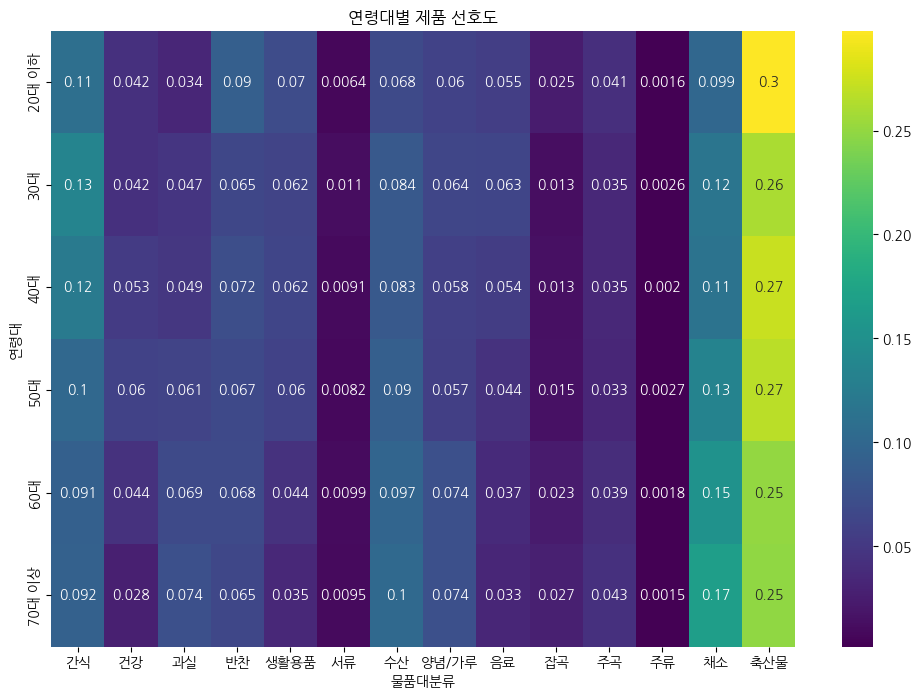

In [ ]:
# 연령대별 제품 선호도 분석
age_product_preference = df.groupby(['연령대', '물품대분류'])['구매금액'].sum().unstack().fillna(0)
age_product_preference = age_product_preference.div(age_product_preference.sum(axis=1), axis=0)

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(age_product_preference, annot=True, cmap='viridis')
plt.title('연령대별 제품 선호도')
plt.show()

In [ ]:
# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(age_product_preference)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 결과 해석
if p < 0.05:
    print("연령대와 제품 선호도 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("연령대와 제품 선호도 간에는 통계적으로 유의한 차이가 없습니다.")

Chi-squared: 0.14129433741219888
P-value: 1.0
Degrees of Freedom: 65
Expected Frequencies:
[[0.1085135  0.04484445 0.05568426 0.07109679 0.05538274 0.0090417
  0.08715202 0.06451156 0.04775436 0.01942809 0.03759252 0.00202873
  0.13050419 0.26646508]
 [0.1085135  0.04484445 0.05568426 0.07109679 0.05538274 0.0090417
  0.08715202 0.06451156 0.04775436 0.01942809 0.03759252 0.00202873
  0.13050419 0.26646508]
 [0.1085135  0.04484445 0.05568426 0.07109679 0.05538274 0.0090417
  0.08715202 0.06451156 0.04775436 0.01942809 0.03759252 0.00202873
  0.13050419 0.26646508]
 [0.1085135  0.04484445 0.05568426 0.07109679 0.05538274 0.0090417
  0.08715202 0.06451156 0.04775436 0.01942809 0.03759252 0.00202873
  0.13050419 0.26646508]
 [0.1085135  0.04484445 0.05568426 0.07109679 0.05538274 0.0090417
  0.08715202 0.06451156 0.04775436 0.01942809 0.03759252 0.00202873
  0.13050419 0.26646508]
 [0.1085135  0.04484445 0.05568426 0.07109679 0.05538274 0.0090417
  0.08715202 0.06451156 0.04775436 0.01942

### 카이제곱 독립성 검정 결과
- h0 : 연령대와 제품 선호도 간에는 통계적으로 유의한 차이가 없다.
- h1 : 연령대와 제품 선호도 간에는 통계적으로 유의한 차이가 있다.
- P-value가 1.0이므로 귀무가설을 기각할 수 없다. 즉, 연령대와 제품 선호도 간에는 통계적으로 유의미한 차이가 없다.이는 연령대에 따른 제품 선호도의 차이가 크게 나지 않으며, 각 연령대가 특정 제품군을 선호하는 경향이 통계적으로 유의미하지 않음을 의미한다.

# 2. 성별에 따른 제품 선호도(물품대분류)분석

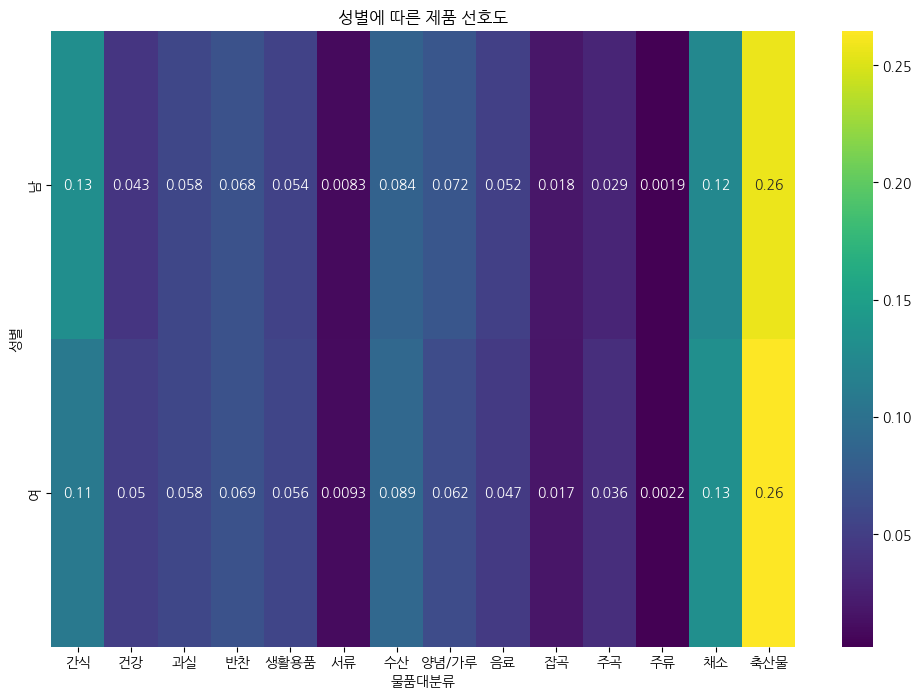

In [ ]:
# 성별에 따른 제품 선호도 분석
gender_product_preference = df.groupby(['성별', '물품대분류'])['구매금액'].sum().unstack().fillna(0)
gender_product_preference = gender_product_preference.div(gender_product_preference.sum(axis=1), axis=0)

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(gender_product_preference, annot=True, cmap='viridis')
plt.title('성별에 따른 제품 선호도')
plt.show()

In [ ]:
# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(gender_product_preference)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 결과 해석
if p < 0.05:
    print("성별과 제품 선호도 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("성별과 제품 선호도 간에는 통계적으로 유의한 차이가 없습니다.")

Chi-squared: 0.005076486443987707
P-value: 1.0
Degrees of Freedom: 13
Expected Frequencies:
[[0.11956613 0.04636704 0.05796565 0.06810758 0.05508337 0.00881231
  0.08663745 0.06692348 0.04939808 0.01714959 0.0327149  0.00205205
  0.12836414 0.26085824]
 [0.11956613 0.04636704 0.05796565 0.06810758 0.05508337 0.00881231
  0.08663745 0.06692348 0.04939808 0.01714959 0.0327149  0.00205205
  0.12836414 0.26085824]]
성별과 제품 선호도 간에는 통계적으로 유의한 차이가 없습니다.


### 카이제곱 독립성 검정 결과
- h0 : 성별과 제품 선호도 간에는 통계적으로 유의한 차이가 있다.
- h1 : 성별과 제품 선호도 간에는 통계적으로 유의한 차이가 없다.
- P-value가 1.0이므로 귀무가설을 기각할 수 없다. 즉, 성별과 제품 선호도 간에는 통계적으로 유의미한 차이가 없다. 이는 성별에 따른 제품 선호도의 차이가 크게 나지 않으며, 각 성별이 특정 제품군을 선호하는 경향이 통계적으로 유의미하지 않음을 의미한다.

# 3. 유기농/비유기농 인기 제품 분석

In [ ]:
# 유기농 여부 추가
product_df['유기농'] = product_df['물품명'].str.contains('유기농')

# 인기가 많은 제품 찾기 (판매량 기준)
product_df['판매량'] = product_df['구매금액']

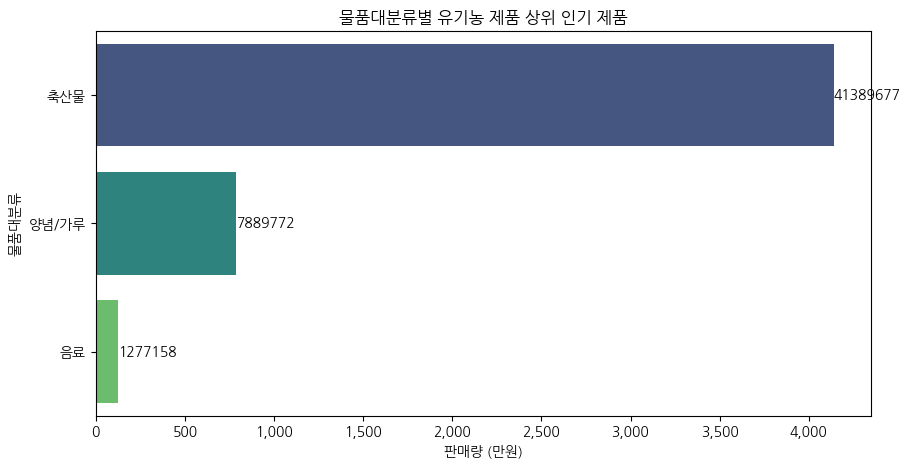

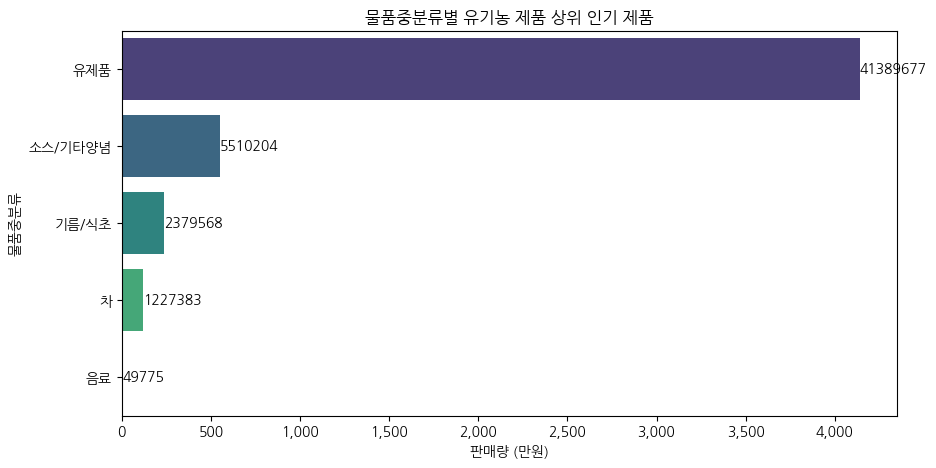

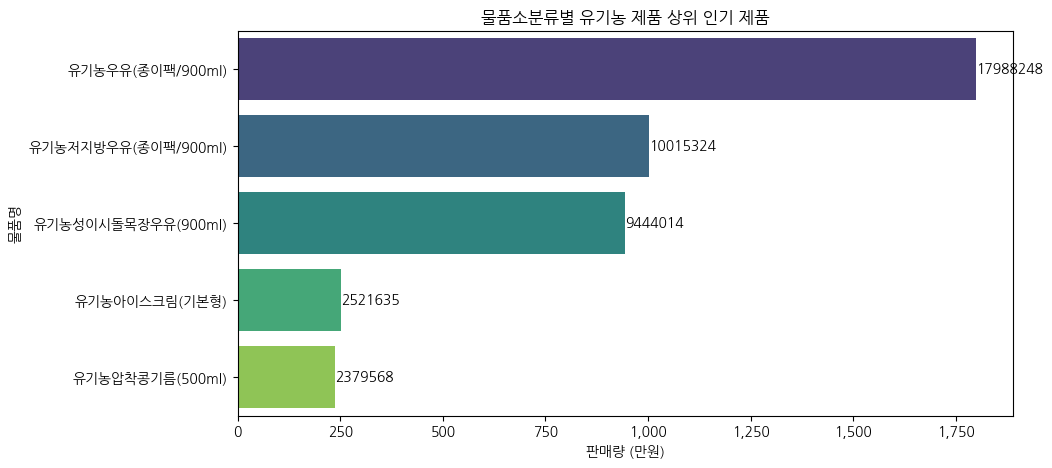

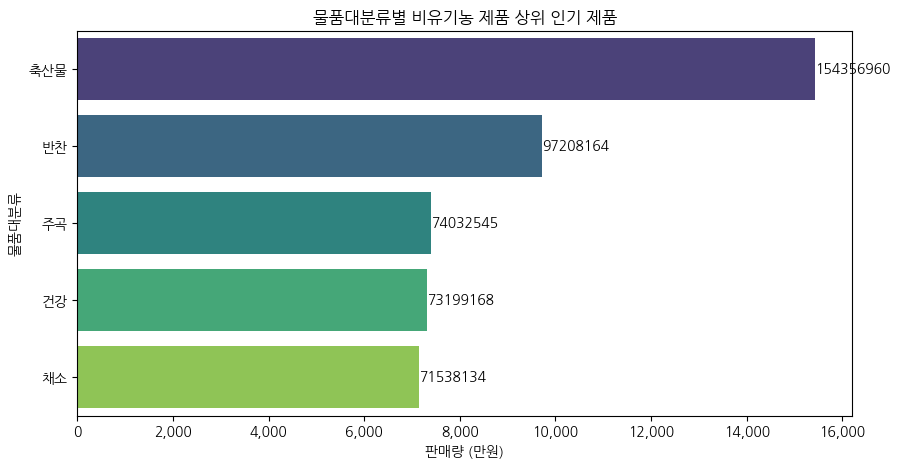

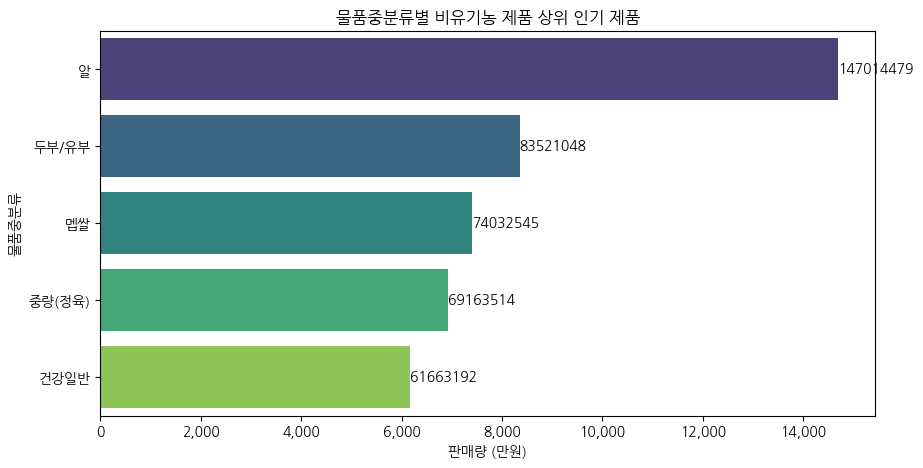

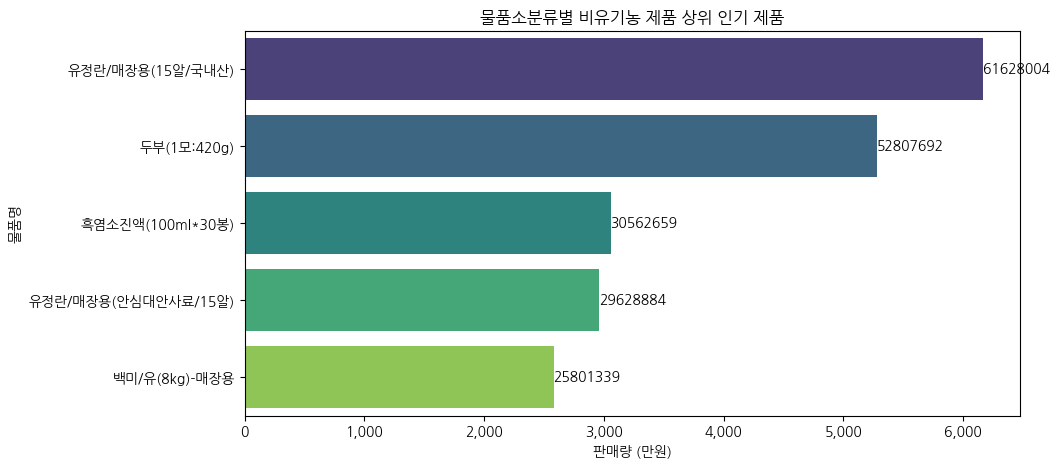

In [ ]:
# 각 분류별로 인기 제품 분석
def get_top_products_by_category(df, category_col, top_n=5):
    top_products = df.groupby([category_col, '물품명'])['판매량'].sum().reset_index()
    top_products = top_products.sort_values(by='판매량', ascending=False).groupby(category_col).head(top_n)
    return top_products

# 유기농 제품 분석
top_organic_products_by_major = get_top_products_by_category(product_df[product_df['유기농'] == True], '물품대분류')
top_organic_products_by_middle = get_top_products_by_category(product_df[product_df['유기농'] == True], '물품중분류')
top_organic_products_by_minor = get_top_products_by_category(product_df[product_df['유기농'] == True], '물품소분류')

# 비유기농 제품 분석
top_non_organic_products_by_major = get_top_products_by_category(product_df[product_df['유기농'] == False], '물품대분류')
top_non_organic_products_by_middle = get_top_products_by_category(product_df[product_df['유기농'] == False], '물품중분류')
top_non_organic_products_by_minor = get_top_products_by_category(product_df[product_df['유기농'] == False], '물품소분류')

# Helper function to plot top products by category
def plot_top_products_by_category(top_products, category_col, title):
    top_products = top_products.groupby(category_col).sum().reset_index().sort_values(by='판매량', ascending=False).head(5)
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=top_products, x='판매량', y=category_col, palette='viridis')
    plt.title(title)
    plt.xlabel('판매량 (만원)')
    plt.ylabel(category_col)
    for i in ax.containers:
        ax.bar_label(i, fmt='%.0f', label_type='edge')
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x / 10000))))
    plt.show()

def plot_top_products_by_product_name(top_products, title):
    top_products = top_products.groupby('물품명').sum().reset_index().sort_values(by='판매량', ascending=False).head(5)
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=top_products, x='판매량', y='물품명', palette='viridis')
    plt.title(title)
    plt.xlabel('판매량 (만원)')
    plt.ylabel('물품명')

    for i in ax.containers:
        ax.bar_label(i, fmt='%.0f', label_type='edge')
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x / 10000))))
    plt.show()

# 시각화
plot_top_products_by_category(top_organic_products_by_major, '물품대분류', '물품대분류별 유기농 제품 상위 인기 제품')
plot_top_products_by_category(top_organic_products_by_middle, '물품중분류', '물품중분류별 유기농 제품 상위 인기 제품')
plot_top_products_by_product_name(top_organic_products_by_minor, '물품소분류별 유기농 제품 상위 인기 제품')

plot_top_products_by_category(top_non_organic_products_by_major, '물품대분류', '물품대분류별 비유기농 제품 상위 인기 제품')
plot_top_products_by_category(top_non_organic_products_by_middle, '물품중분류', '물품중분류별 비유기농 제품 상위 인기 제품')
plot_top_products_by_product_name(top_non_organic_products_by_minor, '물품소분류별 비유기농 제품 상위 인기 제품')



# 그래프에 수치 없는 버전

# # 각 분류별로 인기 제품 분석
# def get_top_products_by_category(df, category_col, top_n=5):
#     top_products = df.groupby([category_col, '물품명'])['판매량'].sum().reset_index()
#     top_products = top_products.sort_values(by='판매량', ascending=False).groupby(category_col).head(top_n)
#     return top_products

# # 유기농 제품 분석
# top_organic_products_by_major = get_top_products_by_category(product_df[product_df['유기농'] == True], '물품대분류')
# top_organic_products_by_middle = get_top_products_by_category(product_df[product_df['유기농'] == True], '물품중분류')
# top_organic_products_by_minor = get_top_products_by_category(product_df[product_df['유기농'] == True], '물품소분류')

# # 비유기농 제품 분석
# top_non_organic_products_by_major = get_top_products_by_category(product_df[product_df['유기농'] == False], '물품대분류')
# top_non_organic_products_by_middle = get_top_products_by_category(product_df[product_df['유기농'] == False], '물품중분류')
# top_non_organic_products_by_minor = get_top_products_by_category(product_df[product_df['유기농'] == False], '물품소분류')

# # Helper function to plot top products by category
# def plot_top_products_by_category(top_products, category_col, title):
#     top_products = top_products.groupby(category_col).sum().reset_index().sort_values(by='판매량', ascending=False).head(5)
#     plt.figure(figsize=(14, 8))
#     sns.barplot(data=top_products, x='판매량', y=category_col, palette='viridis')
#     plt.title(title)
#     plt.xlabel('판매량')
#     plt.ylabel(category_col)
#     plt.show()

# def plot_top_products_by_product_name(top_products, title):
#     top_products = top_products.groupby('물품명').sum().reset_index().sort_values(by='판매량', ascending=False).head(5)
#     plt.figure(figsize=(14, 8))
#     sns.barplot(data=top_products, x='판매량', y='물품명', palette='viridis')
#     plt.title(title)
#     plt.xlabel('판매량')
#     plt.ylabel('물품명')
#     plt.show()

# # 시각화
# plot_top_products_by_category(top_organic_products_by_major, '물품대분류', '물품대분류별 유기농 제품 상위 인기 제품')
# plot_top_products_by_category(top_organic_products_by_middle, '물품중분류', '물품중분류별 유기농 제품 상위 인기 제품')
# plot_top_products_by_product_name(top_organic_products_by_minor, '물품소분류별 유기농 제품 상위 인기 제품')

# plot_top_products_by_category(top_non_organic_products_by_major, '물품대분류', '물품대분류별 비유기농 제품 상위 인기 제품')
# plot_top_products_by_category(top_non_organic_products_by_middle, '물품중분류', '물품중분류별 비유기농 제품 상위 인기 제품')
# plot_top_products_by_product_name(top_non_organic_products_by_minor, '물품소분류별 비유기농 제품 상위 인기 제품')


### 유기농/비유기농 인기 제품군 분석 결론
- 유기농 제품에서는 축산물과 유제품이 대분류와 중분류에서 매우 높은 판매량을 보였다. 소분류에서는 유기농우유 제품들이 가장 인기가 많았다.
- 비유기농 제품에서는 축산물과 알류가 대분류와 중분류에서 높은 판매량을 기록했다. 소분류에서는 유정란/매장용이 가장 높은 판매량을 보였다.